### **Importación de los datos del precio nacional del cacao**

In [24]:
import pandas as pd

# Cargar el archivo Excel
df_precio_nacional = pd.read_excel("DatosAgroNet_limpio.xlsx")

# Mostrar las primeras filas
print(df_precio_nacional.head())

       Fecha   COP/kg
0 2024-01-01  14271.7
1 2024-01-08  14223.3
2 2024-01-15  14086.3
3 2024-01-22  14329.2
4 2024-01-29  14530.8


### **Importación de los datos del precio internacional del cacao**

In [25]:
# Cargar el archivo
df_precio_int = pd.read_excel("DatosICCO_limpio.xlsx")

df_precio_int.rename(columns={'COP/kg': 'COP/kg (internacional)'}, inplace=True)

# Mostrar las primeras filas
print(df_precio_int.head())

       Fecha  USD/tonelada      TRM  COP/kg (internacional)
0 2025-08-15       7831.32  4048.74                31706.98
1 2025-08-14       7848.47  4020.64                31555.87
2 2025-08-13       8129.07  4017.12                32655.45
3 2025-08-12       8163.01  4045.87                33026.48
4 2025-08-11       8013.19  4034.74                32331.14


### **Importación de los datos de inflación nacional**

In [26]:
# Cargar el archivo
df_inflacion = pd.read_excel("Inflacion_mensual.xlsx")

# Limpiar y preparar los datos
df_inflacion = df_inflacion.drop(df_inflacion.index[0])
df_inflacion = df_inflacion.drop(df_inflacion.index[-1])
df_inflacion["Fecha"] = pd.to_datetime(df_inflacion["Fecha"], format="%d/%m/%Y")

df_inflacion.rename(columns={'Inflación total(Dato fin de mes)': 'Inflacion'}, inplace=True)
df_inflacion["Inflacion"] = df_inflacion["Inflacion"].str.replace(",", ".").astype(float)

# Mostrar las primeras filas
print(df_inflacion.head())
print(df_inflacion.shape)

       Fecha  Inflacion
1 1955-07-31      -0.87
2 1955-08-31      -0.01
3 1955-09-30       0.84
4 1955-10-31       0.77
5 1955-11-30       1.44
(844, 2)


In [27]:
# Rango semanal desde la primera hasta la última fecha del df
fechas_semanales = pd.date_range(
    start=df_inflacion["Fecha"].min(),
    end=df_inflacion["Fecha"].max(),
    freq="D"   # frecuencia diaria
)

df_inflacion_adj = pd.DataFrame({"Fecha": fechas_semanales})

# Agregar columnas auxiliares de año y mes
df_inflacion["Año"] = df_inflacion["Fecha"].dt.year
df_inflacion["Mes"] = df_inflacion["Fecha"].dt.month

df_inflacion_adj["Año"] = df_inflacion_adj["Fecha"].dt.year
df_inflacion_adj["Mes"] = df_inflacion_adj["Fecha"].dt.month

# Merge para traer la inflación mensual a cada dia
df_inflacion_adj = df_inflacion_adj.merge(
    df_inflacion[["Año", "Mes", "Inflacion"]],
    on=["Año", "Mes"],
    how="left"
)

df_inflacion_adj = df_inflacion_adj.drop(columns=["Año", "Mes"])

print(df_inflacion_adj.head())

       Fecha  Inflacion
0 1955-07-31      -0.87
1 1955-08-01      -0.01
2 1955-08-02      -0.01
3 1955-08-03      -0.01
4 1955-08-04      -0.01


### **Importación de los datos del precio de contratos futuros de cacao**

In [28]:
# Cargar el archivo
df_futuros = pd.read_csv("Precio_futuros.csv")

# Limpiar y preparar los datos
df_futuros = df_futuros.drop(columns=["London futures (£ sterling/tonne)","ICCO daily price (US$/tonne)","ICCO daily price (Euro/tonne)"])
df_futuros["Date"] = pd.to_datetime(df_futuros["Date"], format="%d/%m/%Y")
df_futuros.rename(columns={'Date': 'Fecha'}, inplace=True)

df_futuros.rename(columns={"New York futures (US$/tonne)": 'Futuros (USD/tonelada)'}, inplace=True)
df_futuros["Futuros (USD/tonelada)"] = df_futuros["Futuros (USD/tonelada)"].str.replace(",", "").astype(float)

# Mostrar las primeras filas
print(df_futuros.head())
print(df_futuros.shape)

       Fecha  Futuros (USD/tonelada)
0 2025-09-01                 7496.00
1 2025-08-29                 7580.00
2 2025-08-28                 7611.67
3 2025-08-27                 7653.00
4 2025-08-26                 7490.00
(6595, 2)


In [29]:
# Cargar el archivo Excel
df_produccion = pd.read_excel("Produccion.xlsx", sheet_name="Produccion", header=0, index_col=0)
df_produccion = df_produccion.T

# Mostrar las primeras filas
print(df_produccion.head())

df_produccion.index = pd.to_numeric(df_produccion.index, errors='coerce').astype('Int64')   # meses 1-12
df_produccion.columns = pd.to_numeric(df_produccion.columns, errors='coerce').astype('Int64')  # años

# Lookup por fila: si existe valor en df_produccion[mes, año] lo asigna a 'Produccion'
def lookup_produccion(row):
    año = pd.to_numeric(row['Año'], errors='coerce')
    mes = pd.to_numeric(row['Mes'], errors='coerce')
    if pd.isna(año) or pd.isna(mes):
        return pd.NA
    try:
        return df_produccion.at[int(mes), int(año)]
    except Exception:
        return pd.NA

AÑO    1982    1983    1984    1985    1986    1987    1988    1989    1990  \
1    3496.0  3033.0  4018.0  4439.0  6372.0  4603.0  3676.0  5037.0  3250.0   
2    2487.0  2664.0  2964.0  3731.0  3766.0  3173.0  4476.0  5632.0  3425.0   
3    2562.0  2788.0  2806.0  1677.0  2576.0  2551.0  3773.0  3404.0  5753.0   
4    2493.0  3017.0  3355.0  2945.0  4089.0  4435.0  2956.0  2372.0  4766.0   
5    3387.0  4523.0  4595.0  3102.0  3865.0  5702.0  3652.0  3180.0  5952.0   

AÑO    1991  ...    2016         2017          2018          2019  \
1    5703.0  ...  3320.0  5228.587507  10111.747938   6791.332740   
2    3395.0  ...  3049.0  3366.280653   7454.122087   6692.649603   
3    3104.0  ...  4981.0  5014.567808   3106.503206   7818.769623   
4    4867.0  ...  4327.0  5330.858093   7506.680251   8435.370094   
5    5691.0  ...  6092.0  6859.715857  11228.581192  13065.520445   

AÑO         2020         2021         2022         2023         2024  \
1    8368.695405  5347.426849  6211.73

### **Merge de las bases de datos en una sola unificada**

In [30]:
# Crear un rango de fechas completo basado en el nacional
fechas_completas = pd.DataFrame({'Fecha': pd.date_range(
    start=df_precio_nacional['Fecha'].min(),
    end=df_precio_nacional['Fecha'].max()
)})

# Forward fill para los dataframe con fechas sin datos
df_precio_int_ffill = fechas_completas.merge(df_precio_int[['Fecha', 'TRM', 'COP/kg (internacional)']], on='Fecha', how='left')
df_precio_int_ffill[['TRM', 'COP/kg (internacional)']] = df_precio_int_ffill[['TRM', 'COP/kg (internacional)']].ffill()

df_futuros_ffill = fechas_completas.merge(df_futuros[['Fecha', 'Futuros (USD/tonelada)']], on='Fecha', how='left')
df_futuros_ffill['Futuros (USD/tonelada)'] = df_futuros_ffill['Futuros (USD/tonelada)'].ffill()


In [31]:
df_unificado = df_precio_nacional.copy()

df_unificado = df_unificado.merge(df_precio_int_ffill, on='Fecha', how='left')
df_unificado = df_unificado.merge(df_inflacion_adj[['Fecha', 'Inflacion']], on='Fecha', how='left')
df_unificado = df_unificado.merge(df_futuros_ffill, on='Fecha', how='left')

df_unificado["COP/kg (futuro)"] = ((df_unificado["Futuros (USD/tonelada)"] * df_unificado["TRM"]) / 1000).round(2)
df_unificado = df_unificado.drop(columns=["Futuros (USD/tonelada)"])


df_unificado['Año'] = df_unificado['Fecha'].dt.year
df_unificado['Mes'] = df_unificado['Fecha'].dt.month
df_unificado['Produccion'] = df_unificado.apply(lookup_produccion, axis=1)
df_unificado['Produccion'] = df_unificado['Produccion'].fillna(method='ffill').fillna(method='bfill')
df_unificado = df_unificado.drop(columns=["Año", "Mes"])

print(df_unificado.head())

# Guardar el DataFrame unificado en un nuevo archivo Excel
df_unificado.to_excel("DatosCacao_multivariado.xlsx", index=False)

       Fecha   COP/kg      TRM  COP/kg (internacional)  Inflacion  \
0 2024-01-01  14271.7      NaN                     NaN       8.35   
1 2024-01-08  14223.3  3912.93                16092.12       8.35   
2 2024-01-15  14086.3  3901.38                17102.48       8.35   
3 2024-01-22  14329.2  3916.39                17909.81       8.35   
4 2024-01-29  14530.8  3925.26                18449.86       8.35   

   COP/kg (futuro)  Produccion  
0              NaN  4682.31484  
1         15859.11  4682.31484  
2         16854.62  4682.31484  
3         17707.29  4682.31484  
4         18378.07  4682.31484  

C:\Users\peter\AppData\Local\Temp\ipykernel_18440\1988092289.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_unificado['Produccion'] = df_unificado['Produccion'].fillna(method='ffill').fillna(method='bfill')


In [32]:
# Ver si hay duplicados
print("¿Hay duplicados?:", df_unificado.duplicated().any())  # True si existe al menos un duplicado
print("Número de filas duplicadas:", df_unificado.duplicated().sum())

# Ver si hay nulos
print("\nCantidad de nulos por columna:")
print(df_unificado.isnull().sum())

df_unificado.fillna(method='bfill', inplace=True)

¿Hay duplicados?: False
Número de filas duplicadas: 0

Cantidad de nulos por columna:
Fecha                     0
COP/kg                    0
TRM                       1
COP/kg (internacional)    1
Inflacion                 0
COP/kg (futuro)           1
Produccion                0
dtype: int64


C:\Users\peter\AppData\Local\Temp\ipykernel_18440\2684744992.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_unificado.fillna(method='bfill', inplace=True)


### **Gráficos de los datos finales**

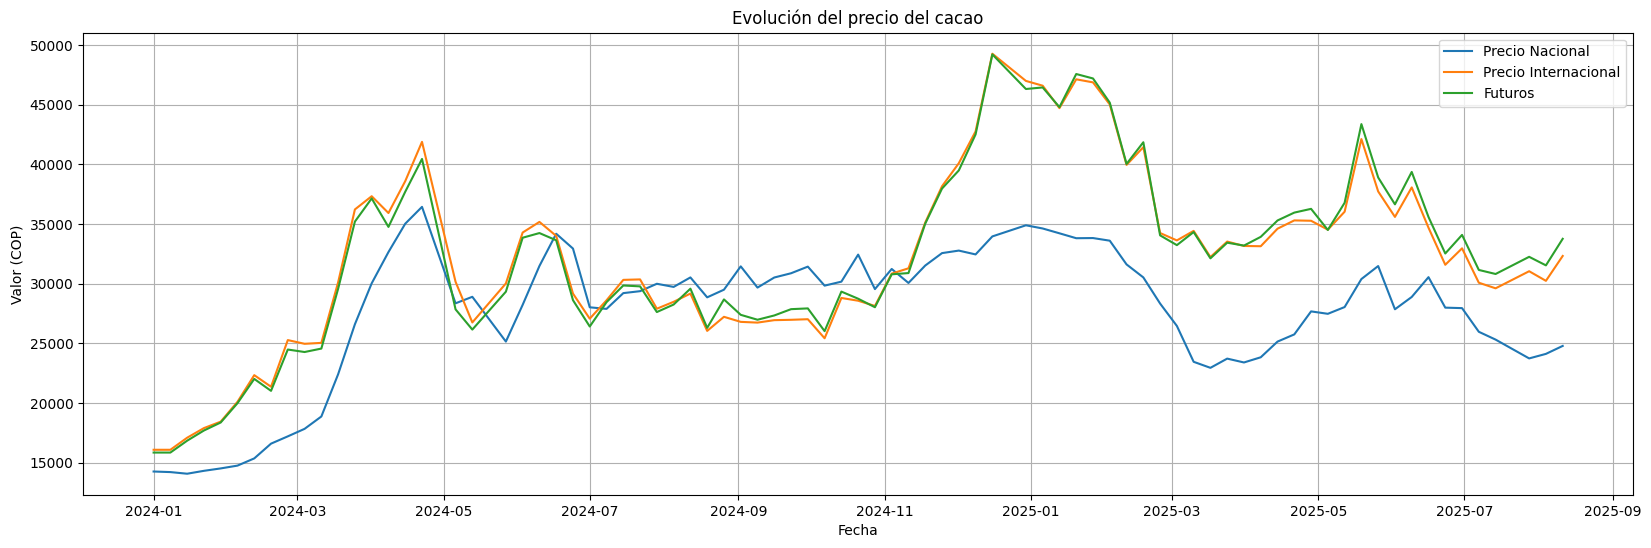

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))

plt.plot(df_unificado["Fecha"], df_unificado["COP/kg"], label="Precio Nacional")
plt.plot(df_unificado["Fecha"], df_unificado["COP/kg (internacional)"], label="Precio Internacional")
plt.plot(df_unificado["Fecha"], df_unificado["COP/kg (futuro)"], label="Futuros")

plt.title("Evolución del precio del cacao")
plt.xlabel("Fecha")
plt.ylabel("Valor (COP)")
plt.legend()
plt.grid(True)
plt.show()


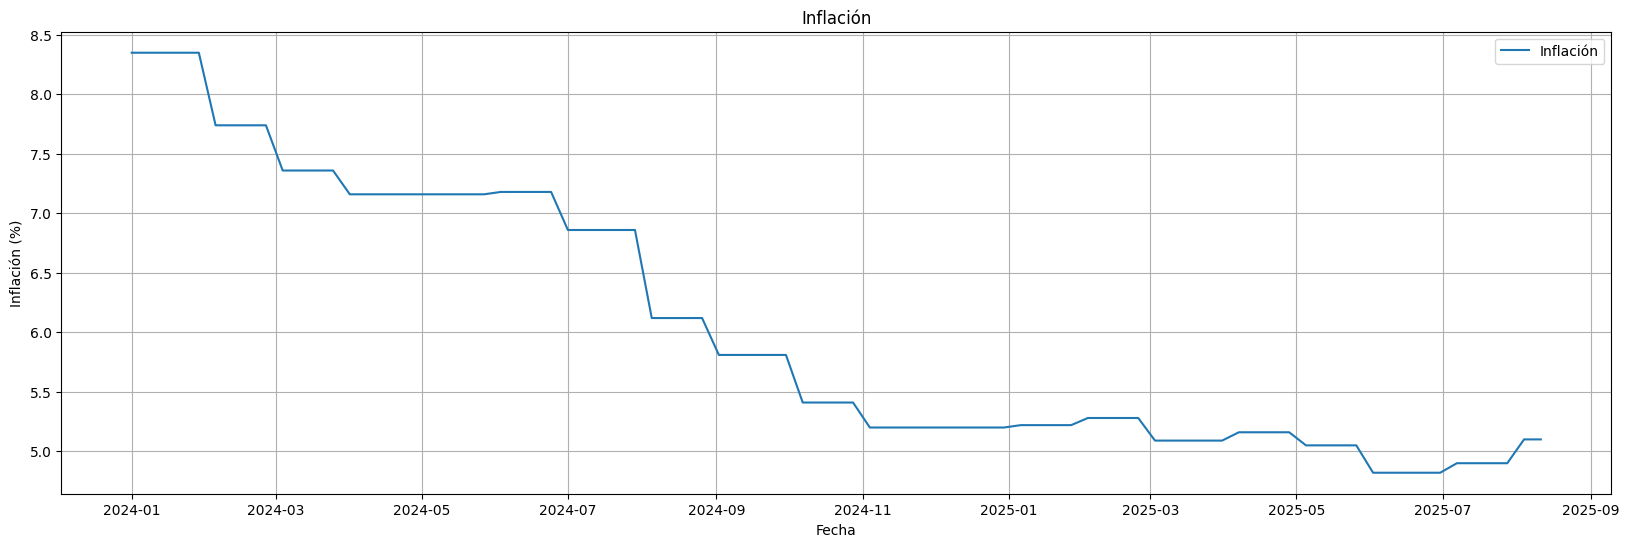

In [34]:
plt.figure(figsize=(20,6))
plt.plot(df_unificado["Fecha"], df_unificado["Inflacion"], label="Inflación")
plt.title("Inflación")
plt.xlabel("Fecha")
plt.ylabel("Inflación (%)")
plt.legend()
plt.grid(True)
plt.show()

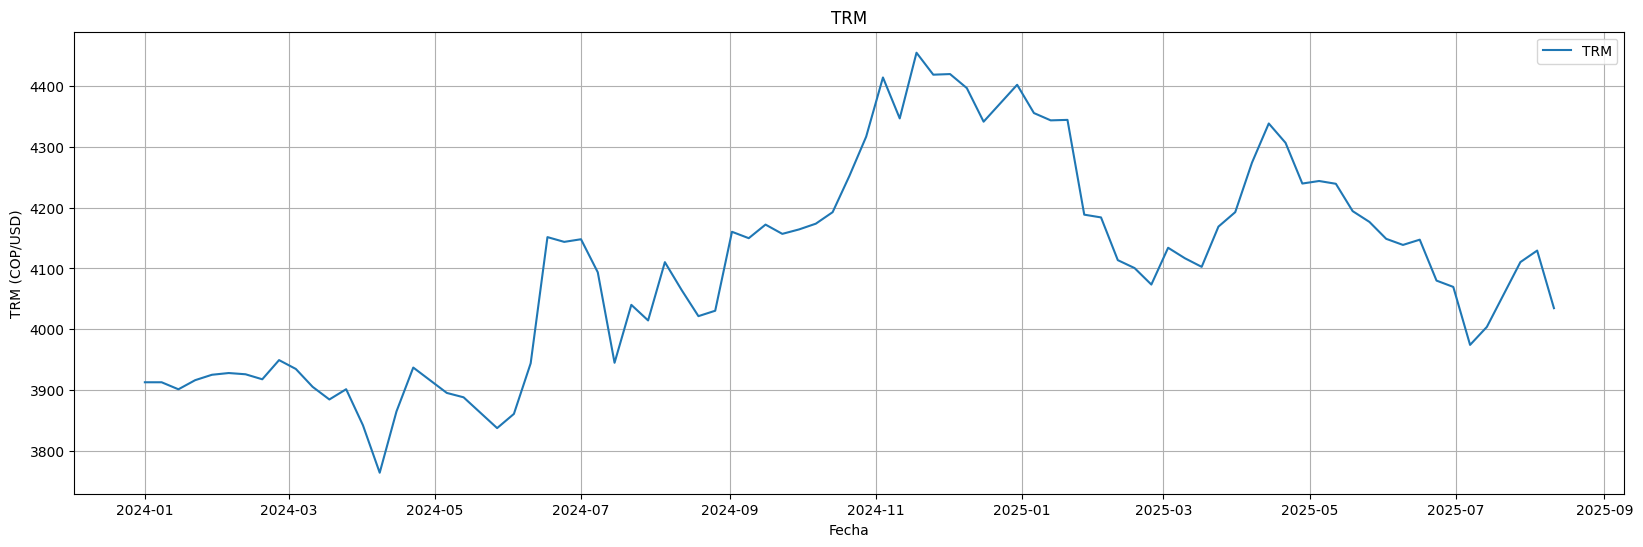

In [35]:
plt.figure(figsize=(20,6))
plt.plot(df_unificado["Fecha"], df_unificado["TRM"], label="TRM")
plt.title("TRM")
plt.xlabel("Fecha")
plt.ylabel("TRM (COP/USD)")
plt.legend()
plt.grid(True)
plt.show()

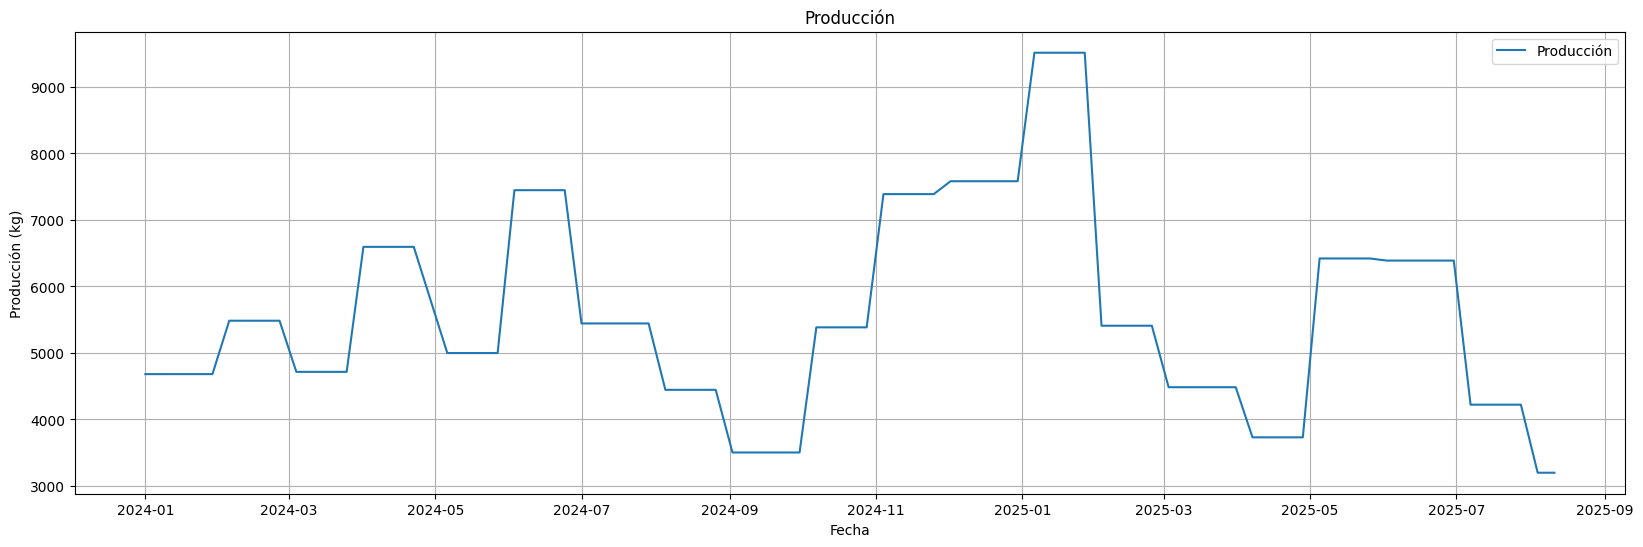

In [36]:
plt.figure(figsize=(20,6))
plt.plot(df_unificado["Fecha"], df_unificado["Produccion"], label="Producción")
plt.title("Producción")
plt.xlabel("Fecha")
plt.ylabel("Producción (kg)")
plt.legend()
plt.grid(True)
plt.show()

### **Pruebas de estacionaridad y cointegración para las variables a usar**

In [37]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    return result[1]  # p-value

def kpss_test(series):
    result = kpss(series.dropna(), regression='c', nlags="auto")
    return result[1]  # p-value

def estacionaridad_tests(df):
    resultados = []
    for col in df.columns:
        try:
            adf_p = adf_test(df[col])
            kpss_p = kpss_test(df[col])
            
            if adf_p < 0.05 and kpss_p > 0.05:
                conclusion = "Estacionaria"
            elif adf_p > 0.05 and kpss_p < 0.05:
                conclusion = "No estacionaria"
            else:
                conclusion = "Inconcluso / revisar"
            
            resultados.append({
                "Variable": col,
                "ADF p-value": round(adf_p, 4),
                "KPSS p-value": round(kpss_p, 4),
                "Conclusión": conclusion
            })
        except Exception as e:
            resultados.append({
                "Variable": col,
                "ADF p-value": None,
                "KPSS p-value": None,
                "Conclusión": f"Error: {e}"
            })
    
    return pd.DataFrame(resultados)


resultados_est = estacionaridad_tests(df_unificado.drop(columns=["Fecha"]))
print(resultados_est)


                 Variable  ADF p-value  KPSS p-value            Conclusión
0                  COP/kg       0.0384        0.0847          Estacionaria
1                     TRM       0.3863        0.0107       No estacionaria
2  COP/kg (internacional)       0.1203        0.0286       No estacionaria
3               Inflacion       0.1945        0.0100       No estacionaria
4         COP/kg (futuro)       0.1092        0.0166       No estacionaria
5              Produccion       0.1249        0.1000  Inconcluso / revisar


C:\Users\peter\AppData\Local\Temp\ipykernel_18440\439823062.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")
C:\Users\peter\AppData\Local\Temp\ipykernel_18440\439823062.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")


In [38]:
correlacion = df_unificado.drop("Fecha", axis=1).corr()
print(correlacion)

                          COP/kg       TRM  COP/kg (internacional)  Inflacion  \
COP/kg                  1.000000  0.487438                0.734757  -0.516817   
TRM                     0.487438  1.000000                0.508035  -0.735146   
COP/kg (internacional)  0.734757  0.508035                1.000000  -0.595988   
Inflacion              -0.516817 -0.735146               -0.595988   1.000000   
COP/kg (futuro)         0.730773  0.534251                0.995259  -0.649411   
Produccion              0.485958  0.334028                0.603835  -0.110944   

                        COP/kg (futuro)  Produccion  
COP/kg                         0.730773    0.485958  
TRM                            0.534251    0.334028  
COP/kg (internacional)         0.995259    0.603835  
Inflacion                     -0.649411   -0.110944  
COP/kg (futuro)                1.000000    0.573806  
Produccion                     0.573806    1.000000  


In [39]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Prueba de cointegración de Johansen
johansen_test = coint_johansen(df_unificado.drop(columns=["Fecha"]), det_order=1, k_ar_diff=1)

# Resultados explicitos
print("Estadísticos de traza:", johansen_test.lr1)
print("Valores críticos (90%,95%,99%):", johansen_test.cvt)


Estadísticos de traza: [79.85369413 49.70614756 30.63746156 19.06399562  9.73307707  1.96094922]
Valores críticos (90%,95%,99%): [[102.4674 107.3429 116.9829]
 [ 75.1027  79.3422  87.7748]
 [ 51.6492  55.2459  62.5202]
 [ 32.0645  35.0116  41.0815]
 [ 16.1619  18.3985  23.1485]
 [  2.7055   3.8415   6.6349]]


In [40]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def johansen_test_summary(df, det_order=1, k_ar_diff=2, alpha=0.05):

    test = coint_johansen(df, det_order=det_order, k_ar_diff=k_ar_diff)
    
    # 0=90%, 1=95%, 2=99%
    crit_index = {0.10: 0, 0.05: 1, 0.01: 2}[alpha]
    
    # Determinar rango de cointegración
    r = 0
    for i in range(len(test.lr1)):
        if test.lr1[i] > test.cvt[i, crit_index]:
            r += 1
        else:
            break
    
    # Imprimir resultado
    if r == 0:
        print(f"No se encontró cointegración al {int((1-alpha)*100)}% de confianza.")
    elif r == 1:
        print("Se encontró 1 relación de cointegración → puedes usar VECM.")
    else:
        print(f"Se encontraron {r} relaciones de cointegración → aplica VECM.")
    
    return r

df_sin_fecha = df_unificado.drop(columns=['Fecha'])
johansen_test_summary(df_sin_fecha)


No se encontró cointegración al 95% de confianza.


0